## Scaling and Standarization




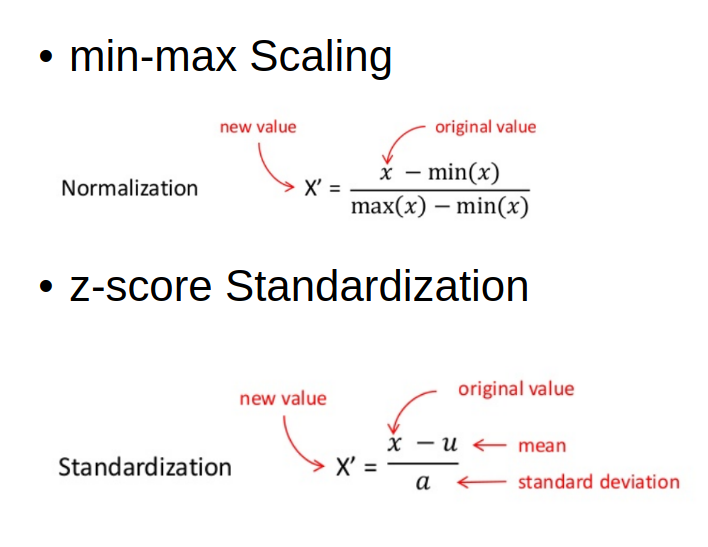

In [1]:
import numpy as np
X=np.array([6 , 2, 7, 5, 0, 4, 2, 4 ,9,10])
print(X)
# MinMax scaling 
X_scaled=(X-min(X))/(max(X)-min(X))
print(X_scaled)
# Standardization
mu=np.mean(X) 
std= np.std(X)
X_stand=(X-mu)/std
print(X_stand)

[ 6  2  7  5  0  4  2  4  9 10]
[0.6 0.2 0.7 0.5 0.  0.4 0.2 0.4 0.9 1. ]
[ 0.36484697 -0.96186928  0.69652603  0.03316791 -1.62522741 -0.29851116
 -0.96186928 -0.29851116  1.35988416  1.69156322]


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Data= pd.DataFrame(np.array([[ 1., -1.,  2.],
                             [ 2.,  0.,  0.],
                             [ 0.,  1., -1.]]),columns=['A','B','C'])

min_max_scaler = MinMaxScaler()
Stand= StandardScaler()

Data_MinMax= pd.DataFrame(min_max_scaler.fit_transform(Data),columns=['A','B','C'])

Data_Stand= pd.DataFrame(Stand.fit_transform(Data),columns=['A','B','C'])

Data

,A,B,C
0,1.0,-1.0,2.0
1,2.0,0.0,0.0
2,0.0,1.0,-1.0


In [3]:
Data_MinMax

,A,B,C
0,0.5,0.0,1.000000
1,1.0,0.5,0.333333
2,0.0,1.0,0.000000


In [4]:
Data_Stand

,A,B,C
0,0.000000,-1.224745,1.336306
1,1.224745,0.000000,-0.267261
2,-1.224745,1.224745,-1.069045


## Categorical features encoding: Label vs One-Hot Encoder


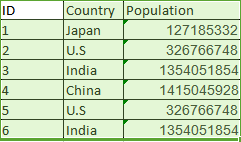

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

DF=pd.DataFrame({'ID':[1,2,3,4,5,6],'Country':['Japan','U.S','India','China','U.S','India'],
                 'Population':[127185332,326766748,1254051854, 1415045928,326766748,1354051854]})
DF.head(3)

,ID,Country,Population
0,1,Japan,127185332
1,2,U.S,326766748
2,3,India,1254051854


In [6]:
LabelEnc=LabelEncoder()
DF['LabelEnc_Country']=LabelEnc.fit_transform(DF['Country'])
DF_all=pd.concat([DF, pd.get_dummies(DF['Country'])],axis=1)
DF_all

,ID,Country,Population,LabelEnc_Country,China,India,Japan,U.S
0,1,Japan,127185332,2,0,0,1,0
1,2,U.S,326766748,3,0,0,0,1
2,3,India,1254051854,1,0,1,0,0
3,4,China,1415045928,0,1,0,0,0
4,5,U.S,326766748,3,0,0,0,1
5,6,India,1354051854,1,0,1,0,0


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Creat Data set 

X=np.random.rand(1,1000)
y= 7*X+ 0.5*np.random.randn(1,1000)
# Split the data into training/testing sets
X_train = X[0,:-200].reshape(-1, 1)
X_test = X[0,-200:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y[0,:-200].reshape(-1, 1)
y_test = y[0,-200:].reshape(-1, 1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
type(regr)

sklearn.linear_model._base.LinearRegression

In [9]:
regr.coef_

array([[6.87252073]])

Coefficients: 
 [[7.00171063]]
Mean squared error: 0.00043521448000416284
Coefficient of determination: 0.9998934446822274


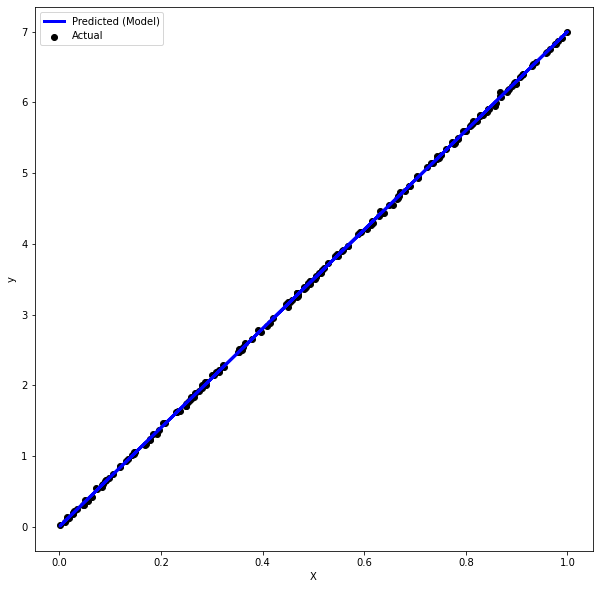

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Creat Data set 

X=np.random.rand(1,1000)
y= 7*X+ 0.02*np.random.randn(1,1000)


# Split the data into training/testing sets
X_train = X[0,:-200].reshape(-1, 1)
X_test = X[0,-200:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y[0,:-200].reshape(-1, 1)
y_test = y[0,-200:].reshape(-1, 1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print(f'Mean squared error: {mean_squared_error(y_test,y_pred)}')
    
# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination: {r2_score(y_test, y_pred)}')

# Plot outputs

plt.figure(figsize=(10,10))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xlabel('X')
plt.ylabel('y')

plt.legend(['Predicted (Model)','Actual'])

plt.show()

In [11]:
y.shape

(1, 1000)

## Classification : KNN algorithm


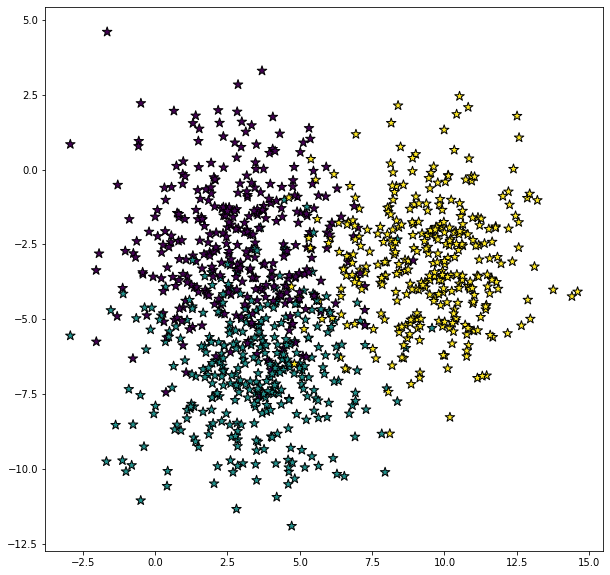

In [12]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=1000, cluster_std=2,centers=3, n_features=2,   random_state=30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], marker='*', c=y, s=100, edgecolor='k')



In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

y_pred=KNN.predict(X_test)

print(f'Accuracy score = {accuracy_score(y_test,y_pred)*100} %')

# predecting an example 
print(KNN.predict([[0,1]]))
print(KNN.predict([[12,1]]))


Accuracy score = 84.84848484848484 %
[0]
[2]


### Pickle your model and use it later 


In [ ]:
import pickle

# save the model to disk
filename = 'KNN_mod.pkl'
pickle.dump(KNN, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
KNN_loaded = pickle.load(open(filename, 'rb'))

y_pred=KNN_loaded.predict(X_test)

print(f'Accuracy score = {accuracy_score(y_test,y_pred)*100} %')

# predecting an example with the loaded model 
print(KNN.predict([[0,1]]))
print(KNN.predict_proba([[0,1]]))


Accuracy score = 84.84848484848484 %
[0]
[[1. 0. 0.]]





## K-Means Clustering with scikit-learn


### Generate the samples

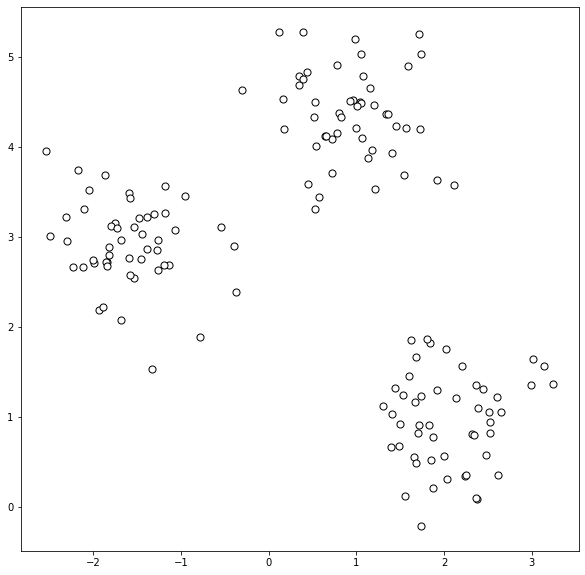

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)


# plot
plt.figure(figsize=(10,10))
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

### Build K-means model 

In [15]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

### Use the K-Means model to classify and visualize samples

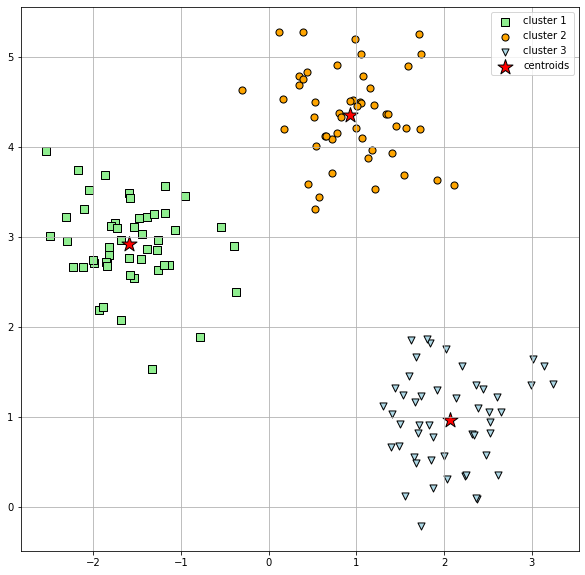

In [16]:
plt.figure(figsize=(10,10))

# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()